In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 15, 8

In [3]:
from masked_normxcorr import masked_normxcorr

In [4]:
templ_orig = cv2.imread("template.png", -1)
templ = cv2.cvtColor(templ_orig, cv2.COLOR_BGR2GRAY).astype(np.float32)/255
mask = (templ_orig[:, :, -1] > 128).astype(np.float32)

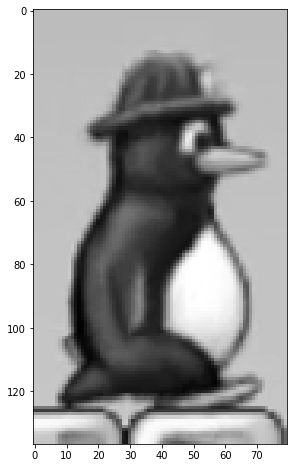

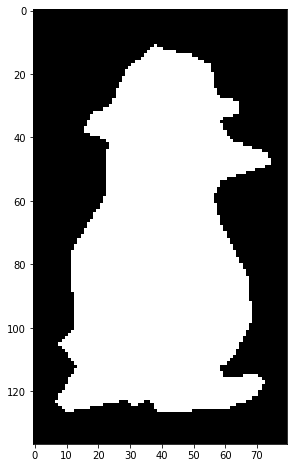

In [5]:
plt.imshow(templ, cmap="gray")
plt.show()
plt.imshow(mask, cmap="gray")
plt.show()

In [6]:
f_name= "image_2.png"
img = cv2.imread(f_name, 0).astype(np.float32)/255

In [7]:
c = masked_normxcorr(cv2.GaussianBlur(img.astype(np.float64), None, 1), templ.astype(np.float64), mask.astype(np.float64))
print(c.max())

0.8732367861748058


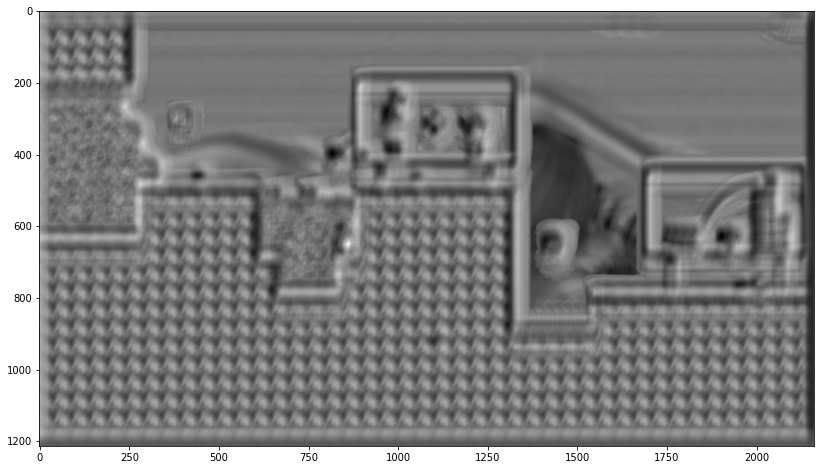

In [8]:
thresh = 0.74

response = masked_normxcorr(cv2.GaussianBlur(img.astype(np.float64), None, 1), templ.astype(np.float64), mask.astype(np.float64))
plt.imshow(response, cmap="gray")
plt.show()

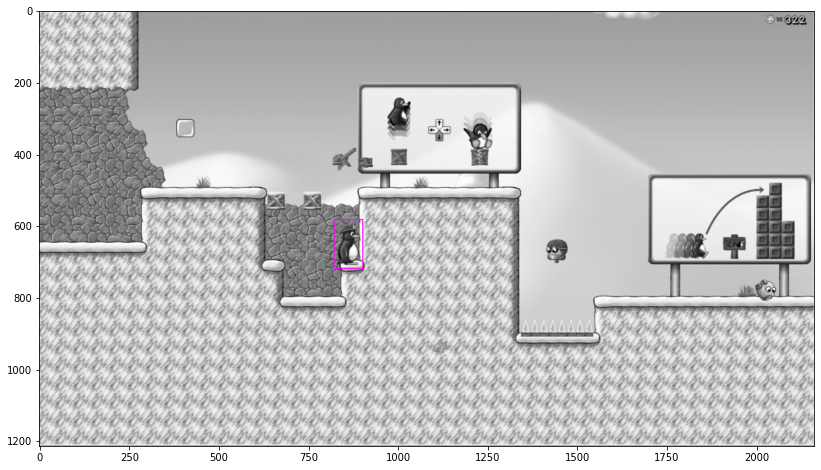

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(templ.shape[1], templ.shape[0]))
response_d = cv2.dilate(response, kernel)
peaks = (response_d == response) 
selected_peaks_mask = peaks & (response > thresh)
selected_peaks = np.nonzero(selected_peaks_mask)

vis = cv2.cvtColor((img*255).astype(np.uint8), cv2.COLOR_GRAY2BGR)

t_width = templ.shape[1]
t_height = templ.shape[0]

for idx in range(selected_peaks[0].shape[0]):
    cx = selected_peaks[1][idx]
    cy = selected_peaks[0][idx]
    cv2.rectangle(vis, (cx - t_width//2, cy - t_height//2), (cx + t_width//2, cy + t_height//2), (255, 0, 255), 2)
    
plt.imshow(vis)
plt.show()

In [10]:
cv2.imwrite("vis.png", vis)

True